In [1]:
import json
import seaborn as sns
import glob
import os
import numpy as np

In [2]:
import pandas as pd
i =0
cladefolders = '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/*/'
allfolders = glob.glob(cladefolders)
dfs = []
print(allfolders)
for clade in allfolders:
    print(clade)
    res = {}
    folders = glob.glob(clade + '*/' )
    for folder in folders:
        if os.path.isfile(folder + 'RFdistances.json' ) and   os.path.isfile(folder + 'treescores.json' ):
            with open(folder + 'RFdistances.json') as rfin:
                rf_res = json.load(rfin)
            with open(folder + 'treescores.json') as taxin:
                tax_res = json.load(taxin)
            tax_res= {s.split('/')[-1]:tax_res[s] for s in tax_res}
            try:
                res[folder] = { s:tax_res[s]['score'] for s in tax_res}
            except:
                pass
    if len(res)>0:
        resdf = pd.DataFrame.from_dict(res, orient = 'index')
        resdf['delta'] = resdf['struct_tree.nwk.PP.nwk.rooted'] - resdf['sequences.aln.fst.nwk.rooted'] 
        resdf['max'] = resdf[['struct_tree.nwk.PP.nwk.rooted','sequences.aln.fst.nwk.rooted']].apply( max , axis = 1) 
        resdf['delta_norm'] = resdf['delta'] / resdf['max']
        resdf['clade'] = clade
        resdf['HOG'] = folder.split('/')[-1]
        dfs.append(resdf)
tree_resdf = pd.concat(dfs)



['/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Euteleostomi/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eumetazoa/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Chordata/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Tetrapoda/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Opisthokonta/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Dikarya/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Fungi/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/']
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Tre

In [3]:
print(tree_resdf)

                                                    struct_tree.nwk.PP.nwk.rooted  \
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             52   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             76   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            141   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             33   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             59   
...                                                                           ...   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                           1102   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            123   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            642   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            716   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...               

In [4]:
#add nsequences 
#ncoverage clade
#len sequence
#pdb pred quality
#rf dist
#resdf = resdf[resdf.clade == '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eumetazoa/' ]
print(len(tree_resdf))

13297


WilcoxonResult(statistic=7599802.5, pvalue=0.0)


<AxesSubplot: xlabel='sequences.aln.fst.nwk.rooted', ylabel='struct_tree.nwk.PP.nwk.rooted'>

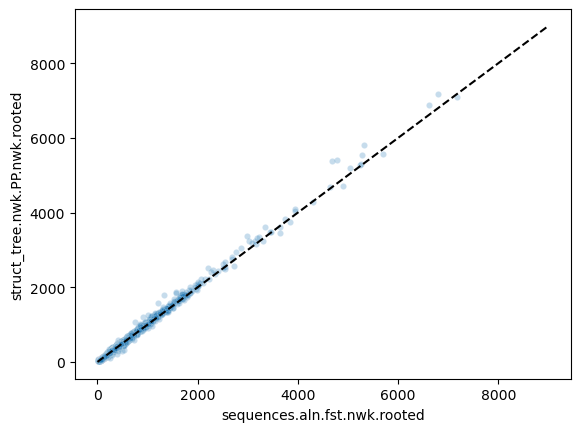

In [16]:
sns.scatterplot(resdf, x = 'sequences.aln.fst.nwk.rooted', y='struct_tree.nwk.PP.nwk.rooted' , alpha = .25 , s = 20 )
from scipy.stats import wilcoxon
print(wilcoxon(tree_resdf.delta))
sns.lineplot(x = [0,9000] , y = [0,9000] , linestyle='--' , c = 'k')

248512
649.2190670242064


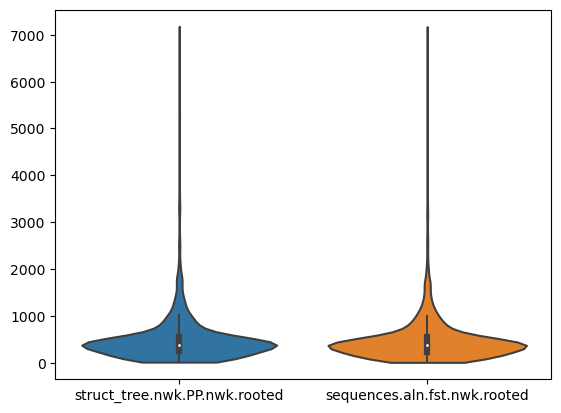

In [24]:
#sns.violinplot(resdf['delta_norm'])
sns.violinplot(resdf[['struct_tree.nwk.PP.nwk.rooted', 'sequences.aln.fst.nwk.rooted']] , cut = 0)
print(tree_resdf['delta'].sum() )
print(tree_resdf['delta_norm'].sum() )

<AxesSubplot: >

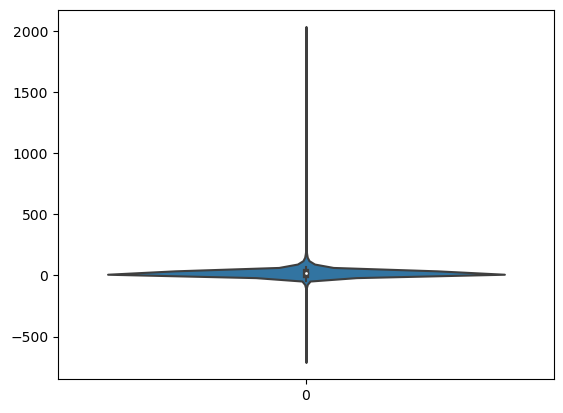

In [18]:
sns.violinplot(tree_resdf['delta'])

/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/
struct_tree.nwk.PP.nwk.rooted    73.247761
sequences.aln.fst.nwk.rooted     73.005970
delta                             0.241791
max                              74.807463
delta_norm                        0.002882
dtype: float64


/tmp/24562418/ipykernel_1532408/763918884.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


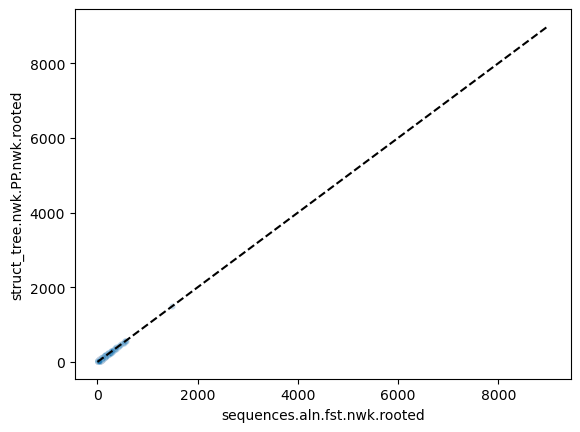

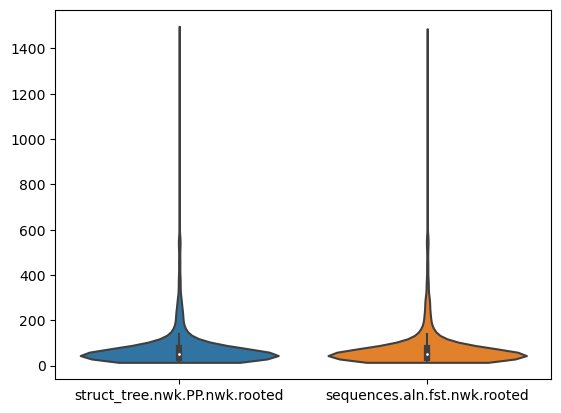

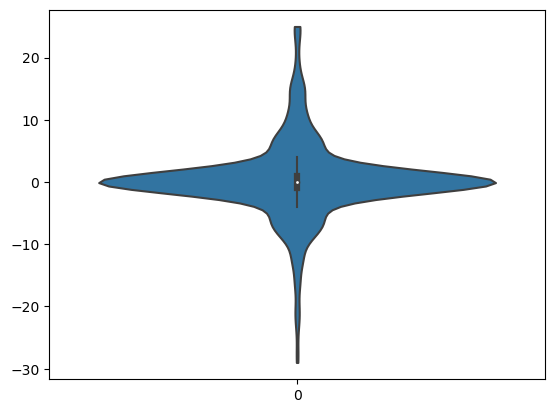

162 WilcoxonResult(statistic=45774.5, pvalue=0.47774620786025124)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/
struct_tree.nwk.PP.nwk.rooted    287.413669
sequences.aln.fst.nwk.rooted     279.925180
delta                              7.488489
max                              290.689209
delta_norm                         0.007197
dtype: float64


/tmp/24562418/ipykernel_1532408/763918884.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


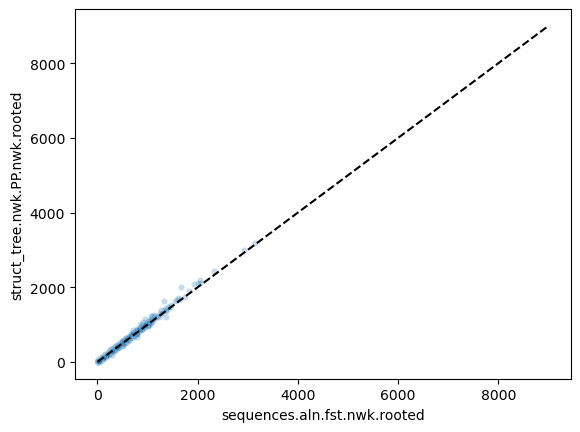

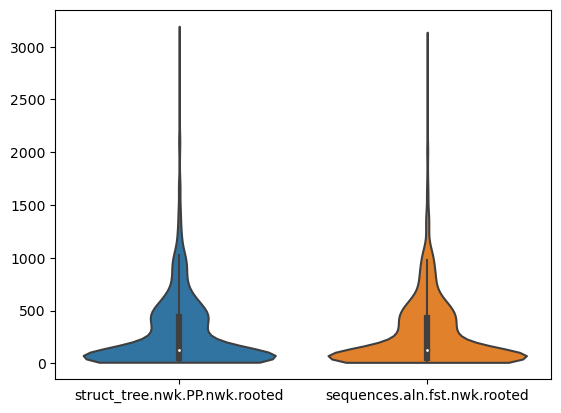

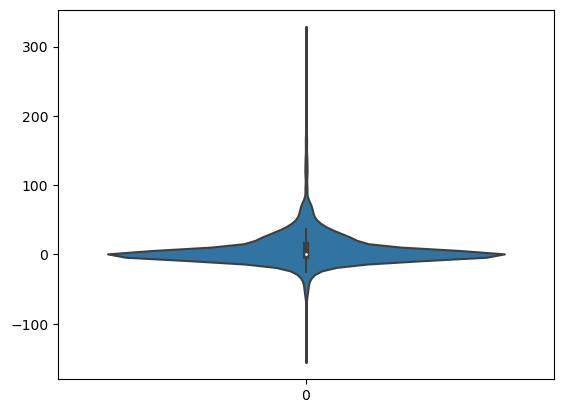

10409 WilcoxonResult(statistic=256878.5, pvalue=6.662060770263911e-22)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Euteleostomi/
struct_tree.nwk.PP.nwk.rooted    256.586445
sequences.aln.fst.nwk.rooted     236.179793
delta                             20.406652
max                              257.518983
delta_norm                         0.079817
dtype: float64


/tmp/24562418/ipykernel_1532408/763918884.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


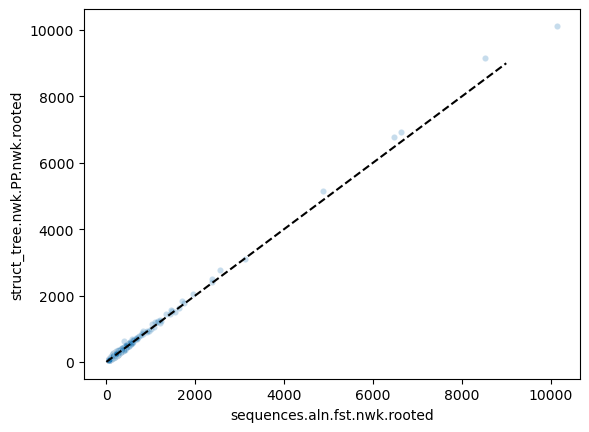

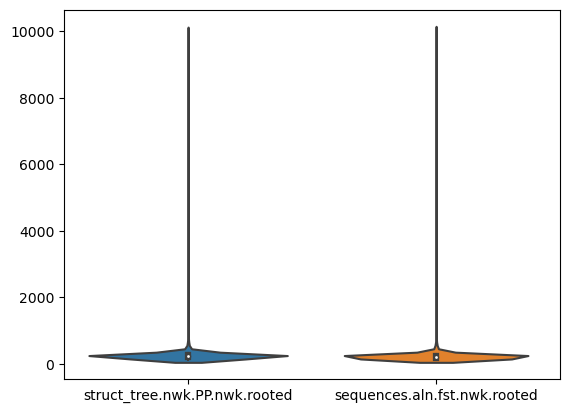

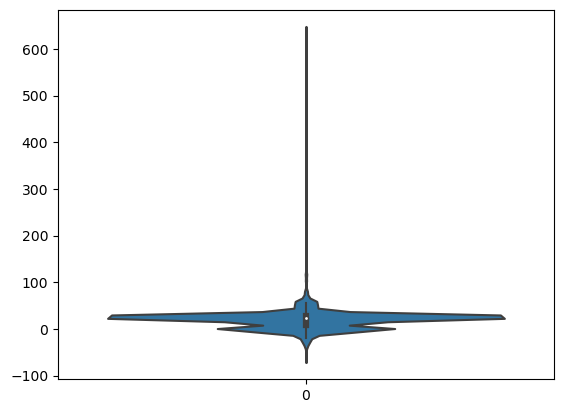

65036 WilcoxonResult(statistic=147577.5, pvalue=0.0)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eumetazoa/
struct_tree.nwk.PP.nwk.rooted    383.782497
sequences.aln.fst.nwk.rooted     360.751609
delta                             23.030888
max                              386.040541
delta_norm                         0.059276
dtype: float64


/tmp/24562418/ipykernel_1532408/763918884.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


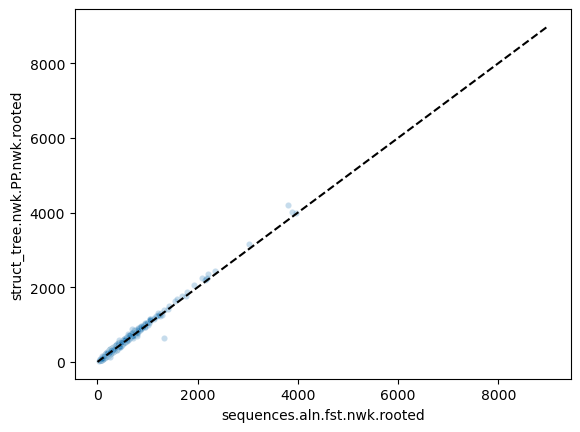

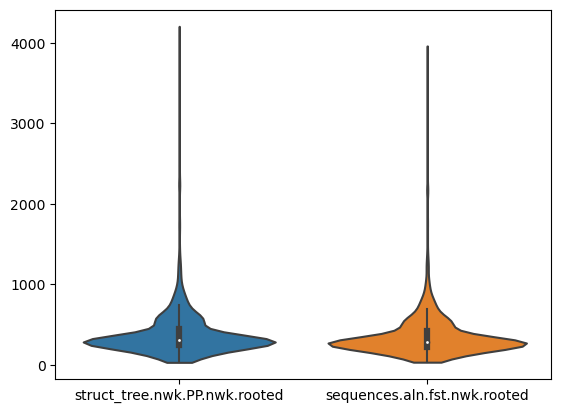

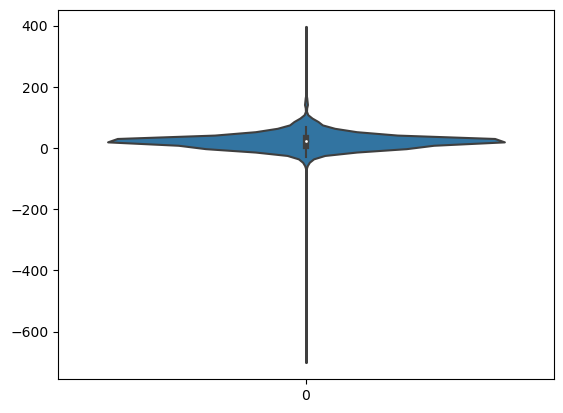

35790 WilcoxonResult(statistic=72582.5, pvalue=5.159286964950983e-181)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Chordata/
struct_tree.nwk.PP.nwk.rooted    436.161227
sequences.aln.fst.nwk.rooted     403.760633
delta                             32.400593
max                              437.070227
delta_norm                         0.076455
dtype: float64


/tmp/24562418/ipykernel_1532408/763918884.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


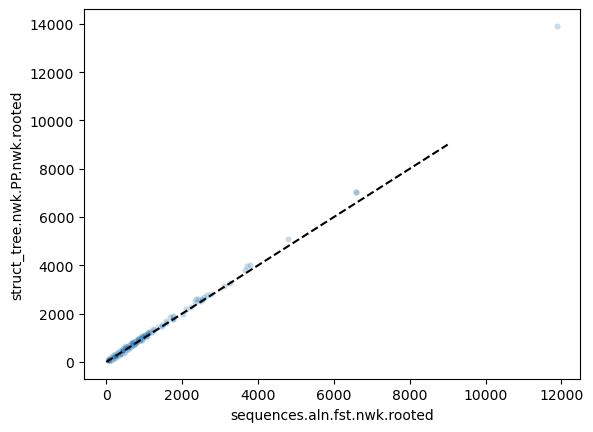

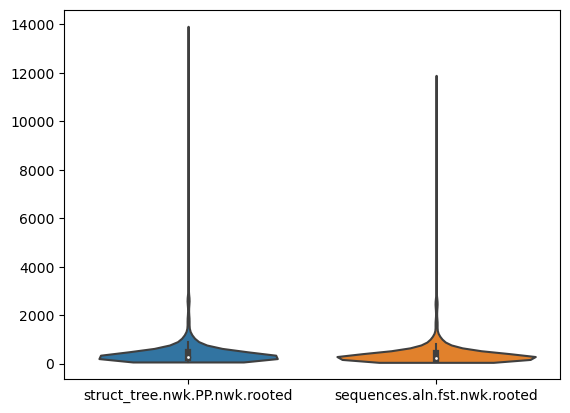

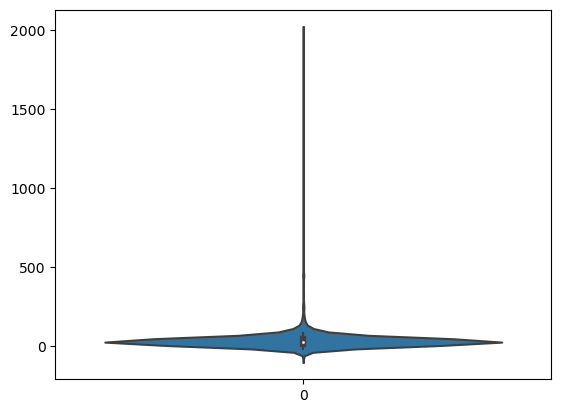

32757 WilcoxonResult(statistic=11136.0, pvalue=2.808729127939266e-136)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Tetrapoda/
struct_tree.nwk.PP.nwk.rooted    328.710145
sequences.aln.fst.nwk.rooted     298.368116
delta                             30.342029
max                              329.200000
delta_norm                         0.100290
dtype: float64


/tmp/24562418/ipykernel_1532408/763918884.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


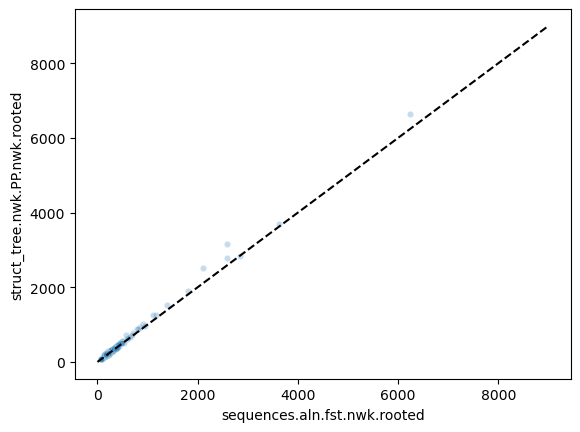

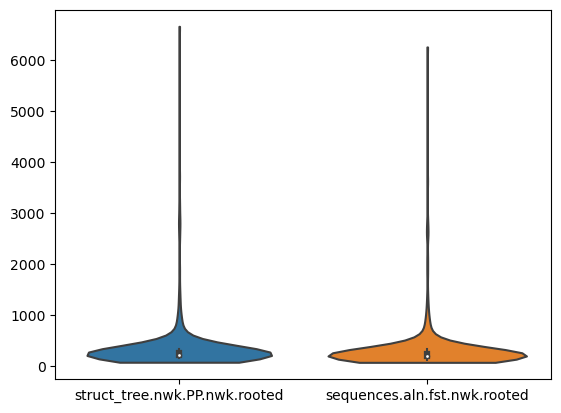

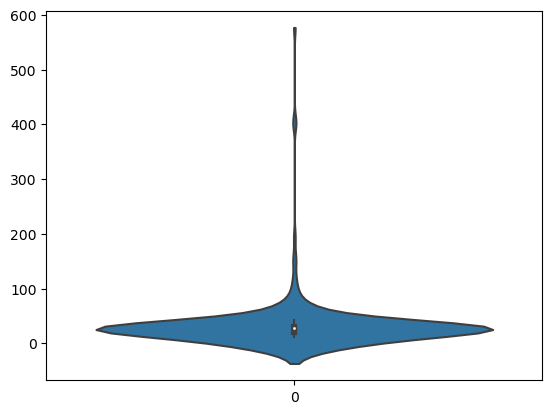

10468 WilcoxonResult(statistic=885.0, pvalue=5.319136035640426e-51)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Opisthokonta/
struct_tree.nwk.PP.nwk.rooted    403.172308
sequences.aln.fst.nwk.rooted     380.929231
delta                             22.243077
max                              405.564615
delta_norm                         0.047106
dtype: float64


/tmp/24562418/ipykernel_1532408/763918884.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


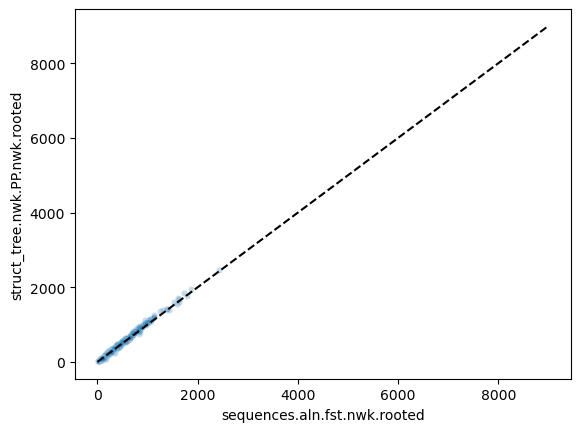

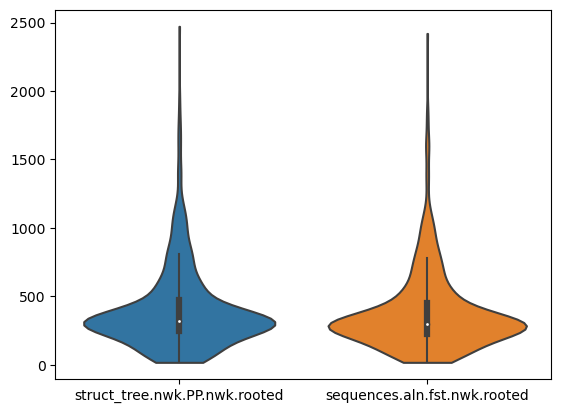

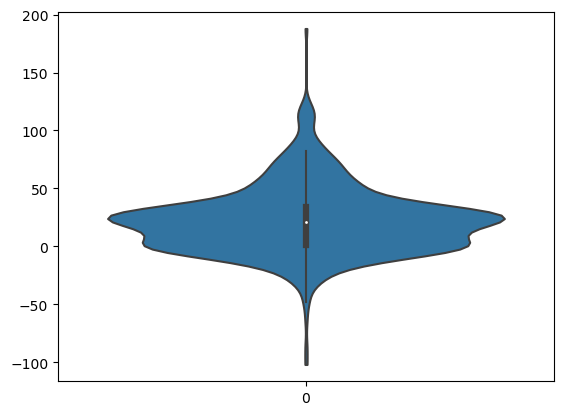

14458 WilcoxonResult(statistic=19465.0, pvalue=2.44826913038591e-65)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Dikarya/
struct_tree.nwk.PP.nwk.rooted    96.132597
sequences.aln.fst.nwk.rooted     97.077348
delta                            -0.944751
max                              97.679558
delta_norm                       -0.010380
dtype: float64


/tmp/24562418/ipykernel_1532408/763918884.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


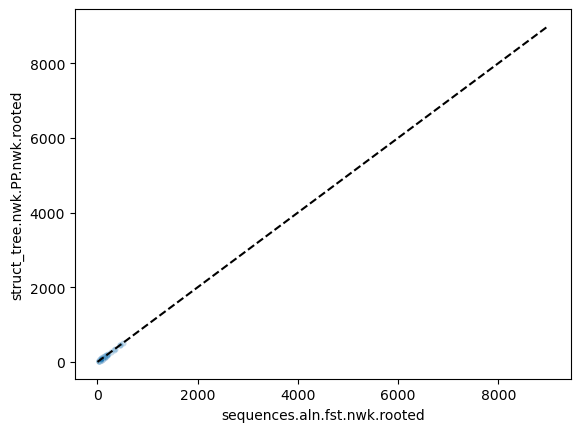

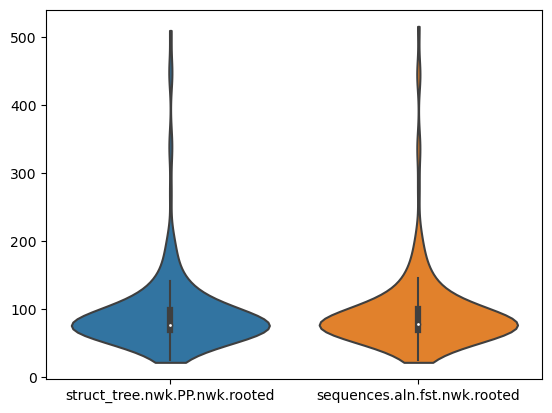

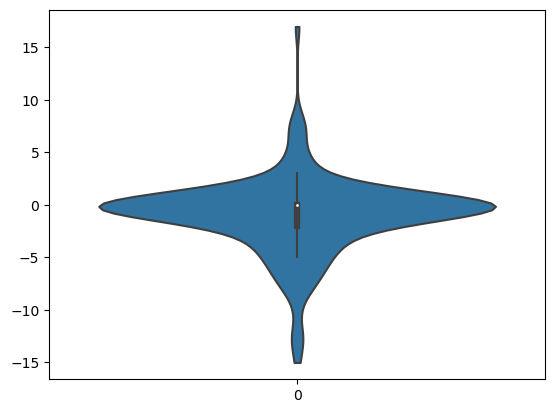

-171 WilcoxonResult(statistic=1764.0, pvalue=0.0001086738379315738)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Fungi/
struct_tree.nwk.PP.nwk.rooted    79.856061
sequences.aln.fst.nwk.rooted     81.333333
delta                            -1.477273
max                              82.128788
delta_norm                       -0.017878
dtype: float64


/tmp/24562418/ipykernel_1532408/763918884.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


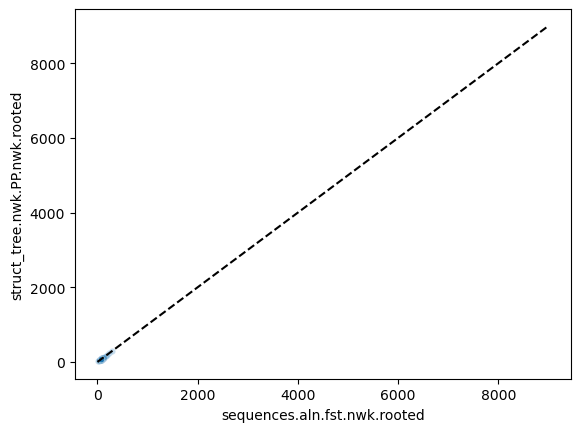

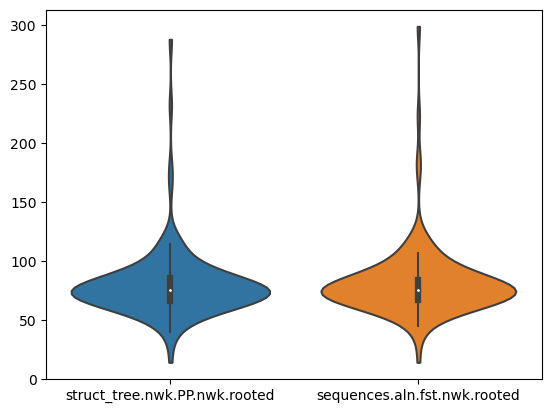

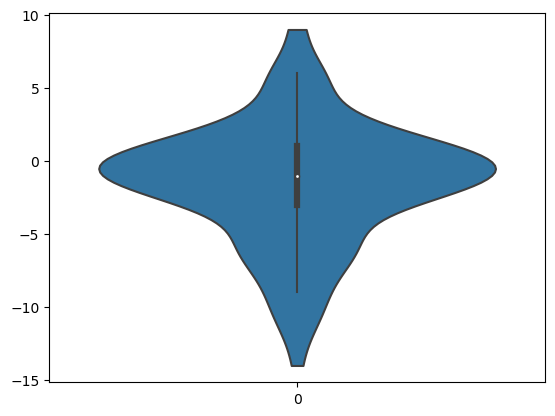

-195 WilcoxonResult(statistic=1554.5, pvalue=8.051644182372542e-05)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/
struct_tree.nwk.PP.nwk.rooted    395.001003
sequences.aln.fst.nwk.rooted     370.848546
delta                             24.152457
max                              396.631896
delta_norm                         0.057251
dtype: float64


/tmp/24562418/ipykernel_1532408/763918884.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


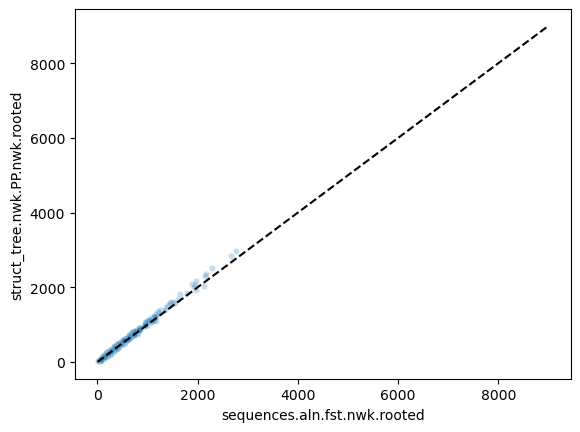

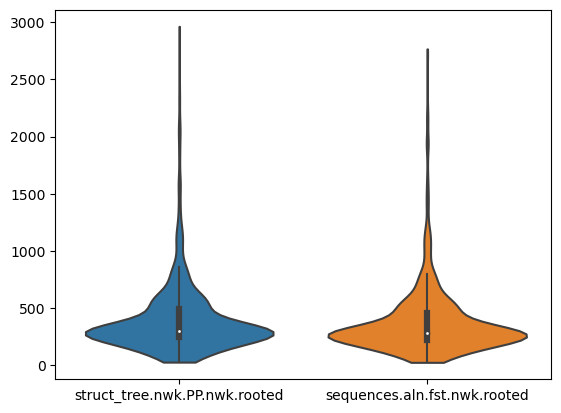

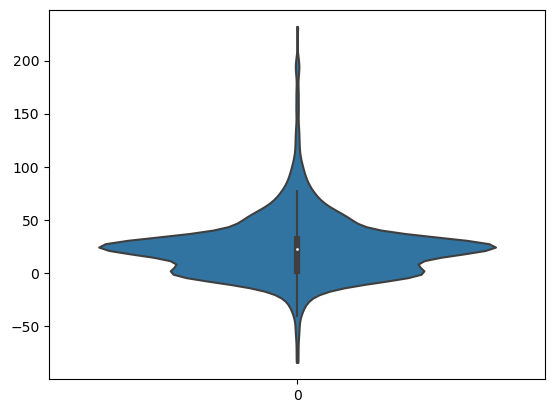

24080 WilcoxonResult(statistic=24147.0, pvalue=2.8779134024888524e-113)
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/
struct_tree.nwk.PP.nwk.rooted    506.183962
sequences.aln.fst.nwk.rooted     488.662579
delta                             17.521384
max                              509.967610
delta_norm                         0.030012
dtype: float64


/tmp/24562418/ipykernel_1532408/763918884.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sub.mean())


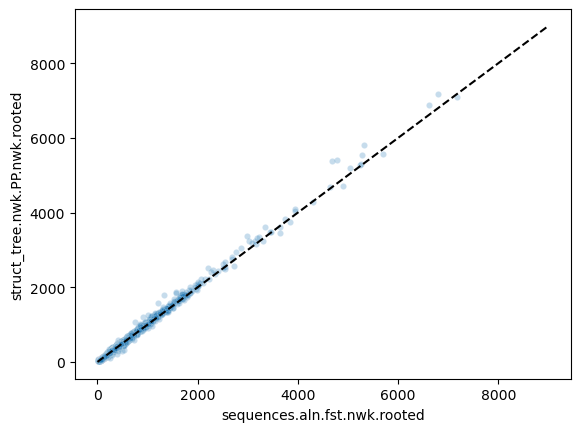

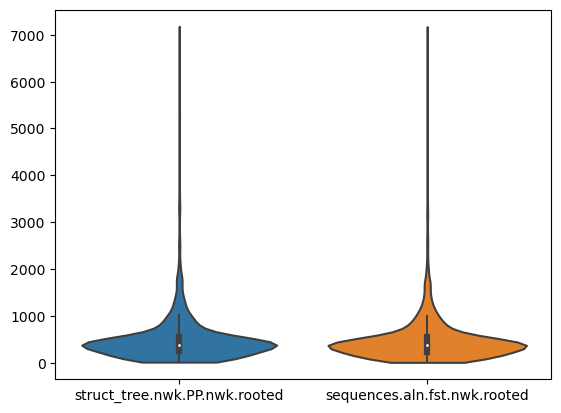

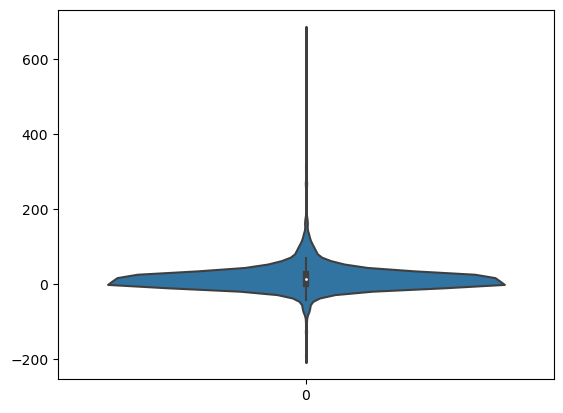

55718 WilcoxonResult(statistic=726099.5, pvalue=1.832849033373089e-207)


In [26]:
#sub = resdf[['sequences.aln.fst.nwk.rooted' , 'struct_tree.nwk.PP.nwk.rooted' ]]
from matplotlib import pyplot as plt

for folder in tree_resdf.clade.unique():
    print(folder)
    sub = tree_resdf[tree_resdf.clade == folder]
    
    print(sub.mean())
    
    sns.scatterplot(sub, x = 'sequences.aln.fst.nwk.rooted', y='struct_tree.nwk.PP.nwk.rooted' , alpha = .25 , s=20 )
    sns.lineplot(x = [0,9000] , y = [0,9000] , linestyle='--' , c = 'k')
    plt.show()
    sns.violinplot(sub[['struct_tree.nwk.PP.nwk.rooted', 'sequences.aln.fst.nwk.rooted']] , cut = 0 )
    plt.show()
    sns.violinplot(sub['delta'] , cut = 0 )
    plt.show()

    print( sub.delta.sum(), wilcoxon(sub.delta))
    
    
    
    

In [10]:
#construct structure and sequence feature dataset

def ret_description(vec , label = ''):
    return { label+'_mean': np.mean(vec) , label+'_max': np.amax(vec) , label+'_min': np.amin(vec) ,label+'_var': np.var(vec) }

allfolders = glob.glob(cladefolders)
dfs = []
print(allfolders)
for clade in allfolders:
    print(clade)
    res = {}
    folders = glob.glob(clade + '*/' )
    for folder in folders:
        if os.path.isfile(folder + 'plddt.json' ) and os.path.isfile(folder + 'sequence_dataset.csv' ) :
            plddt_df = pd.read_json(folder + 'plddt.json').T
            if len(plddt_df)>0:
                try:
                    plddt_df.columns = 'nobs,minmax,mean,variance,skewness,kurtosis'.split(',')
                    plddt_df['min'] = plddt_df.minmax.map( lambda r: r[0] )
                    plddt_df['max'] = plddt_df.minmax.map( lambda r: r[1] )
                    res[folder] = {}
                    for col in ['nobs', 'min' , 'max' , 'mean' , 'variance' , 'skewness' , 'kurtosis' ]:
                        descriptors = ret_description(plddt_df[col] , label = col)
                        for l in descriptors:
                            res[folder][l] = descriptors[l]
                    #add in some descriptors of the taxonomic spread and sequence set
                    seqdf = pd.read_csv(folder+'sequence_dataset.csv' )
                    res[folder]['nprots'] = len(seqdf)
                    cladesets = [ set(l.split(',')) for l in  seqdf['Taxonomic lineage (Ids)'] ]
                    union_all = cladesets[0]
                    intersection_all = cladesets[0]
                    for c in cladesets:
                        union_all = union_all.union(c)
                        intersection_all.intersection(c)
                    res[folder]['n_clades'] = len(union_all)
                    res[folder]['inter_clades'] = len(intersection_all)
                    res[folder]['inter/nc'] =  res[folder]['inter_clades'] /  res[folder]['n_clades'] 
                    res[folder]['nc/np'] = res[folder]['nprots'] / res[folder]['n_clades']
                except:
                    pass
    resdf = pd.DataFrame.from_dict(res, orient = 'index')
    dfs.append(resdf)
seqset_resdf = pd.concat(dfs)

['/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/LUCA/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Euteleostomi/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eumetazoa/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Chordata/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Tetrapoda/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Opisthokonta/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Dikarya/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Fungi/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bilateria/', '/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Eukaryota/']
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Trees/Bacteria/
/work/FAC/FBM/DBC/cdessim2/default/dmoi/datasets/Structure_Tre

In [13]:
print(seqset_resdf)
seqset_resdf.to_csv('structure_and_sequence_qcmetrics.csv')

                                                      nobs_mean  nobs_max  \
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   807.250000       985   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   521.944444       811   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   401.434783       516   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...    64.357143        71   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   204.133333       215   
...                                                         ...       ...   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...  1041.146067      1191   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   446.782609       581   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   351.106061       480   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   384.032787       506   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...   890.324324      1124   

                                                    nobs_min     nobs_var  

In [14]:
#add to the tree comparison data
tree_resdf = tree_resdf.merge( seqset_resdf , left_index = True, right_index = True, how = 'inner' )
print(tree_resdf)

                                                    struct_tree.nwk.PP.nwk.rooted  \
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             52   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             76   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            141   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             33   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                             59   
...                                                                           ...   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                           1102   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            123   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            642   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...                            716   
/work/FAC/FBM/DBC/cdessim2/default/dmoi/dataset...               

In [15]:
print(tree_resdf.columns)

Index(['struct_tree.nwk.PP.nwk.rooted', 'sequences.aln.fst.nwk.rooted',
       'delta', 'max', 'delta_norm', 'clade', 'HOG', 'nobs_mean', 'nobs_max',
       'nobs_min', 'nobs_var', 'min_mean', 'min_max', 'min_min', 'min_var',
       'max_mean', 'max_max', 'max_min', 'max_var', 'mean_mean', 'mean_max',
       'mean_min', 'mean_var', 'variance_mean', 'variance_max', 'variance_min',
       'variance_var', 'skewness_mean', 'skewness_max', 'skewness_min',
       'skewness_var', 'kurtosis_mean', 'kurtosis_max', 'kurtosis_min',
       'kurtosis_var', 'nprots', 'n_clades', 'inter_clades', 'inter/nc',
       'nc/np'],
      dtype='object')


In [16]:
#try to predict the delta using these features w gradient boosted trees
#try to predict the RF distance as well

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [21]:
X, y = tree_resdf[['nobs_mean', 'nobs_max',
       'nobs_min', 'nobs_var', 'min_mean', 'min_max', 'min_min', 'min_var',
       'max_mean', 'max_max', 'max_min', 'max_var', 'mean_mean', 'mean_max',
       'mean_min', 'mean_var', 'variance_mean', 'variance_max', 'variance_min',
       'variance_var', 'skewness_mean', 'skewness_max', 'skewness_min',
       'skewness_var', 'kurtosis_mean', 'kurtosis_max', 'kurtosis_min',
       'kurtosis_var', 'nprots', 'n_clades', 'inter_clades', 'inter/nc',
       'nc/np']], tree_resdf.delta_norm

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}


reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

The mean squared error (MSE) on test set: 0.0051


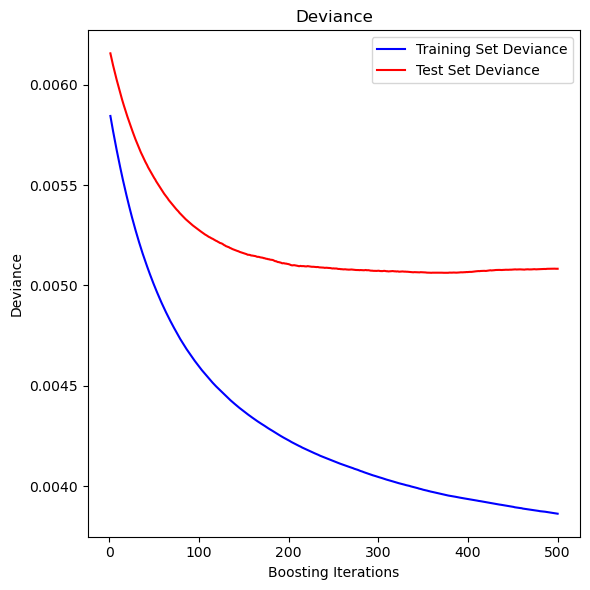

In [22]:
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

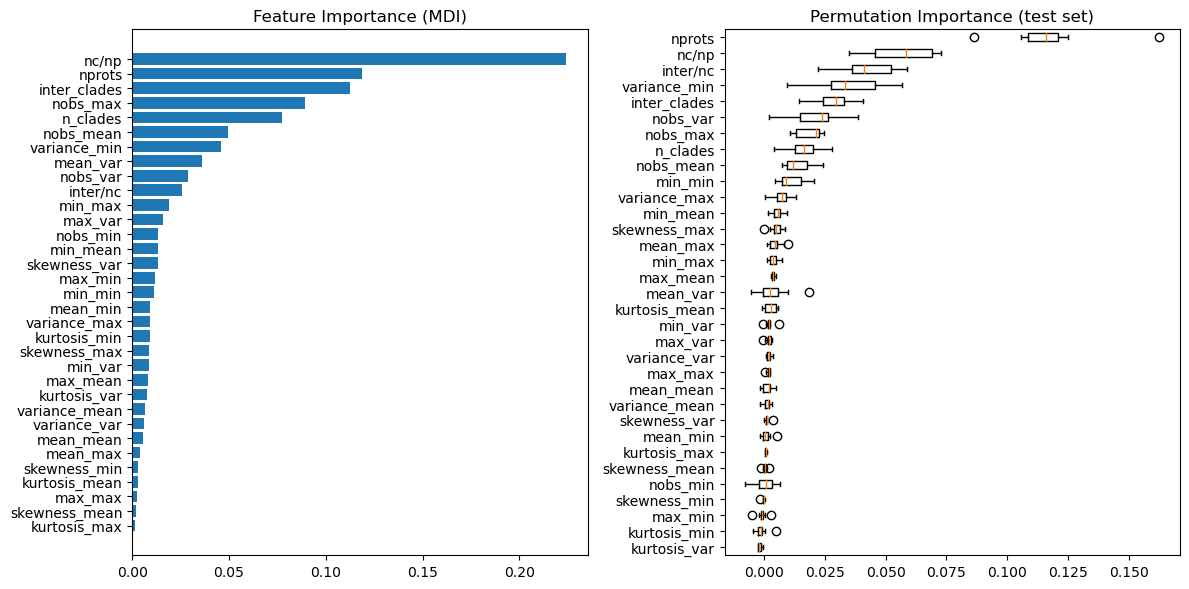

In [24]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()